### Netflix EDA
- 아래의 서비스에서 데이터를 수집하여 EDA를 수행하세요.


- flixpatrol 사이트에서 데이터 수집
    - `https://flixpatrol.com/top10/netflix/world/2021/full/#netflix-1`


- kaggle에서 netflix 컨텐츠 데이터 수집
    - `https://www.kaggle.com/shivamb/netflix-shows`


- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [148]:
year = 2021
url = f'https://flixpatrol.com/top10/netflix/world/{year}/full/#netflix-1'

In [149]:
response = requests.get(url)
response

<Response [200]>

In [150]:
response.text[:300]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\t<title>TOP 10 on Netflix in the World in 2021 (Full) • FlixPatrol</title>\n\t<link rel="preload" as="fon'

In [28]:
dom = BeautifulSoup(response.text, "html.parser")

In [29]:
type(dom)

bs4.BeautifulSoup

In [101]:
elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")

In [102]:
len(elements)

176

In [103]:
elements[0]

<tr class="table-group">
<td class="table-td w-12 font-semibold text-right text-gray-500 table-hover:text-gray-400">1.</td>
<td class="table-td w-10">
<span class="inline-block align-bottom w-6 h-6 rounded-full text-blue-100 bg-blue-600 text-xxs leading-6 text-center">n/a</span>
</td>
<td class="table-td">
<a class="hover:underline" href="/title/red-notice/">Red Notice</a>
<span class="inline-block align-baseline w-3 h-3" title="This title is Netflix original">
<svg viewbox="0 0 512 512"><path d="M304 0h96v512h-96zM112 0h96v512h-96z" fill="#b20710"></path><path d="M400 512h-96L112 0h96z" fill="#e50914"></path></svg>
</span> </td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">25,918</td>
<td class="table-td w-18 text-right text-gray-500 table-hover:text-gray-400">–</td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">90</td>
<td class="table-td w-16 text-right text-gray-500 table-hover:text-gray-400">288</td>
<td class="table-td w-12 text-right text-g

In [104]:
element = elements[0]

data = {
    "title" : element.select("td")[2].text.strip(),
    "points" : element.select("td")[3].text.strip(),
    "countries" : element.select("td")[5].text.strip(),
    "ptn/ctry" : element.select("td")[6].text.strip(),
    "days" : element.select("td")[7].text.strip(),
    "ptn/day" : element.select("td")[8].text.strip(),
    "total" : element.select("td")[9].text.strip(),
}

data

{'title': 'Red Notice',
 'points': '25,918',
 'countries': '90',
 'ptn/ctry': '288',
 'days': '48',
 'ptn/day': '540',
 'total': '25,918'}

In [105]:
datas = []
for element in elements:
    datas.append({
        "title" : element.select("td")[2].text.strip(),
        "points" : element.select("td")[3].text.strip(),
        "countries" : element.select("td")[5].text.strip(),
        "ptn/ctry" : element.select("td")[6].text.strip(),
        "days" : element.select("td")[7].text.strip(),
        "ptn/day" : element.select("td")[8].text.strip(),
        "total" : element.select("td")[9].text.strip(),
    })
    
datas

nf_movies = pd.DataFrame(datas)
nf_movies['type'] = 'Movie'
nf_movies.tail(2)

,title,points,countries,ptn/ctry,days,ptn/day,total,type
174,Bombshell,181,2,91,14,13,181,Movie
175,Man on a Ledge,174,4,44,13,13,174,Movie


In [106]:
elements = dom.select('#netflix-2 > div.-mx-content > div > div > table > tbody > tr')

In [107]:
len(elements)

152

In [108]:
elements[0]

<tr class="table-group">
<td class="table-td w-12 font-semibold text-right text-gray-500 table-hover:text-gray-400">1.</td>
<td class="table-td w-10">
<span class="inline-block align-bottom w-6 h-6 rounded-full text-blue-100 bg-blue-600 text-xxs leading-6 text-center">n/a</span>
</td>
<td class="table-td">
<a class="hover:underline" href="/title/squid-game/">Squid Game</a>
<span class="inline-block align-baseline w-3 h-3" title="This title is Netflix original">
<svg viewbox="0 0 512 512"><path d="M304 0h96v512h-96zM112 0h96v512h-96z" fill="#b20710"></path><path d="M400 512h-96L112 0h96z" fill="#e50914"></path></svg>
</span> </td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">57,980</td>
<td class="table-td w-18 text-right text-gray-500 table-hover:text-gray-400">–</td>
<td class="table-td w-12 text-right text-gray-400 font-semibold">90</td>
<td class="table-td w-16 text-right text-gray-500 table-hover:text-gray-400">644</td>
<td class="table-td w-12 text-right text-g

In [109]:
element = elements[0]

data = {
    "title" : element.select("td")[2].text.strip(),
    "points" : element.select("td")[3].text.strip(),
    "countries" : element.select("td")[5].text.strip(),
    "ptn/ctry" : element.select("td")[6].text.strip(),
    "days" : element.select("td")[7].text.strip(),
    "ptn/day" : element.select("td")[8].text.strip(),
    "total" : element.select("td")[9].text.strip(),
}


data

{'title': 'Squid Game',
 'points': '57,980',
 'countries': '90',
 'ptn/ctry': '644',
 'days': '104',
 'ptn/day': '558',
 'total': '57,980'}

In [110]:
datas = []
for element in elements:
    datas.append({
        "title" : element.select("td")[2].text.strip(),
        "points" : element.select("td")[3].text.strip(),
        "countries" : element.select("td")[5].text.strip(),
        "ptn/ctry" : element.select("td")[6].text.strip(),
        "days" : element.select("td")[7].text.strip(),
        "ptn/day" : element.select("td")[8].text.strip(),
        "total" : element.select("td")[9].text.strip(),
    })
    
datas

nf_tv = pd.DataFrame(datas)
nf_tv['type'] = 'TV show'
nf_tv.tail(2)

,title,points,countries,ptn/ctry,days,ptn/day,total,type
150,Beauty and the Baker,"1,638",18,91,28,58,"1,638",TV show
151,Zero Chill,"1,631",49,33,20,82,"1,631",TV show


In [111]:
nf_mvtv = pd.concat([nf_movies, nf_tv], axis=0, ignore_index=True)

In [112]:
nf_mvtv

,title,points,countries,ptn/ctry,days,ptn/day,total,type
0,Red Notice,"25,918",90,288,48,540,"25,918",Movie
1,We Can Be Heroes,"25,311",82,309,214,118,"25,311",Movie
2,Army of the Dead,"18,888",89,212,92,205,"18,888",Movie
3,Wish Dragon,"16,953",82,207,88,193,"16,953",Movie
4,Army of Thieves,"15,081",90,168,52,290,"15,081",Movie
...,...,...,...,...,...,...,...,...
323,Fatma,"1,680",44,38,47,36,"1,680",TV show
324,Sweet Home,"1,656",22,75,50,33,"1,656",TV show
325,Outlander,"1,642",22,75,104,16,"1,642",TV show
326,Beauty and the Baker,"1,638",18,91,28,58,"1,638",TV show


In [151]:
def nf(year):
    url1 = f'https://flixpatrol.com/top10/netflix/world/{year}/full/#netflix-1'
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select("#netflix-1 > div.-mx-content > div > div > table > tbody > tr")
    datas = []
    for element in elements:
        datas.append({
            "title" : element.select("td")[2].text.strip(),
            "points" : element.select("td")[3].text.strip(),
            "countries" : element.select("td")[5].text.strip(),
            "ptn/ctry" : element.select("td")[6].text.strip(),
            "days" : element.select("td")[7].text.strip(),
            "ptn/day" : element.select("td")[8].text.strip(),
            "total" : element.select("td")[9].text.strip(),
        })
    nf_movies = pd.DataFrame(datas)
    nf_movies['type'] = 'Movie'
    
    url2 = f'https://flixpatrol.com/top10/netflix/world/{year}/full/#netflix-1'
    response = requests.get(url)
    dom = BeautifulSoup(response.text, "html.parser")
    elements = dom.select('#netflix-2 > div.-mx-content > div > div > table > tbody > tr')
    datas = []
    for element in elements:
        datas.append({
            "title" : element.select("td")[2].text.strip(),
            "points" : element.select("td")[3].text.strip(),
            "countries" : element.select("td")[5].text.strip(),
            "ptn/ctry" : element.select("td")[6].text.strip(),
            "days" : element.select("td")[7].text.strip(),
            "ptn/day" : element.select("td")[8].text.strip(),
            "total" : element.select("td")[9].text.strip(),
        })
    nf_tv = pd.DataFrame(datas)
    nf_tv['type'] = 'TV Show'
    
    return pd.concat([nf_movies, nf_tv], axis=0, ignore_index=True)

In [154]:
nfs = []
year = [2020, 2021, 2022]
for i in year:
    print(i, end=' ')
    nfs.append(nf(year))

[2020, 2021, 2022] [2020, 2021, 2022] [2020, 2021, 2022] 

In [155]:
result_nf = pd.concat(nfs, ignore_index=True)

In [156]:
result_nf

,title,points,countries,ptn/ctry,days,ptn/day,total,type
0,Red Notice,"25,918",90,288,48,540,"25,918",Movie
1,We Can Be Heroes,"25,311",82,309,214,118,"25,311",Movie
2,Army of the Dead,"18,888",89,212,92,205,"18,888",Movie
3,Wish Dragon,"16,953",82,207,88,193,"16,953",Movie
4,Army of Thieves,"15,081",90,168,52,290,"15,081",Movie
...,...,...,...,...,...,...,...,...
979,Fatma,"1,680",44,38,47,36,"1,680",TV Show
980,Sweet Home,"1,656",22,75,50,33,"1,656",TV Show
981,Outlander,"1,642",22,75,104,16,"1,642",TV Show
982,Beauty and the Baker,"1,638",18,91,28,58,"1,638",TV Show


In [157]:
nf_titles = pd.read_csv('netflix_titles.csv')

In [158]:
nf_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [159]:
nf_titles['rating']= nf_titles['rating'].map({'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'})

In [160]:
nf_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [161]:
nf_titles.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [163]:
nf = pd.merge(nf_titles, result_nf, on='title', how='inner')

In [164]:
nf

,show_id,type_x,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,points,countries,ptn/ctry,days,ptn/day,total,type_y
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"4,860",79,62,31,157,"4,860",TV Show
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"4,860",79,62,31,157,"4,860",TV Show
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"4,860",79,62,31,157,"4,860",TV Show
3,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"9,615",81,119,41,235,"9,615",Movie
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"9,615",81,119,41,235,"9,615",Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,s8259,Movie,The Croods,"Kirk De Micco, Chris Sanders","Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe...",United States,"July 29, 2019",2013,Older Kids,99 min,"Children & Family Movies, Comedies","When an earthquake obliterates their cave, an ...","4,247",78,54,52,82,"4,247",Movie
566,s8259,Movie,The Croods,"Kirk De Micco, Chris Sanders","Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe...",United States,"July 29, 2019",2013,Older Kids,99 min,"Children & Family Movies, Comedies","When an earthquake obliterates their cave, an ...","4,247",78,54,52,82,"4,247",Movie
567,s8502,Movie,The Secret Life of Pets 2,Chris Renaud,"Patton Oswalt, Kevin Hart, Tiffany Haddish, Je...","United States, France, Japan","December 27, 2019",2019,Older Kids,86 min,"Children & Family Movies, Comedies","On a farm outside New York, Max aims to boost ...","8,161",54,151,322,25,"8,161",Movie
568,s8502,Movie,The Secret Life of Pets 2,Chris Renaud,"Patton Oswalt, Kevin Hart, Tiffany Haddish, Je...","United States, France, Japan","December 27, 2019",2019,Older Kids,86 min,"Children & Family Movies, Comedies","On a farm outside New York, Max aims to boost ...","8,161",54,151,322,25,"8,161",Movie


In [165]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       570 non-null    object
 1   type_x        570 non-null    object
 2   title         570 non-null    object
 3   director      294 non-null    object
 4   cast          546 non-null    object
 5   country       453 non-null    object
 6   date_added    567 non-null    object
 7   release_year  570 non-null    int64 
 8   rating        570 non-null    object
 9   duration      570 non-null    object
 10  listed_in     570 non-null    object
 11  description   570 non-null    object
 12  points        570 non-null    object
 13  countries     570 non-null    object
 14  ptn/ctry      570 non-null    object
 15  days          570 non-null    object
 16  ptn/day       570 non-null    object
 17  total         570 non-null    object
 18  type_y        570 non-null    object
dtypes: int64

In [166]:
nf['points'] = nf['points'].apply(lambda data: int(data.replace(',', '')))

In [167]:
nf = nf.astype({'countries':int, 'ptn/ctry':int, 'days':int, 'ptn/day':int})

In [180]:
nf.head()

,show_id,type_x,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,points,countries,ptn/ctry,days,ptn/day,total,type_y
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4860,79,62,31,157,"4,860",TV Show
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4860,79,62,31,157,"4,860",TV Show
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4860,79,62,31,157,"4,860",TV Show
3,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9615,81,119,41,235,"9,615",Movie
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9615,81,119,41,235,"9,615",Movie


In [194]:
nf['duration'].value_counts()

1 Season      54
2 Seasons     18
3 Seasons     10
102 min        8
4 Seasons      7
110 min        5
97 min         5
94 min         4
5 Seasons      4
107 min        4
86 min         3
105 min        3
112 min        3
138 min        3
114 min        3
113 min        3
119 min        2
87 min         2
92 min         2
121 min        2
115 min        2
106 min        2
90 min         2
7 Seasons      2
10 Seasons     2
120 min        2
98 min         2
116 min        2
101 min        2
99 min         2
118 min        2
84 min         1
89 min         1
134 min        1
81 min         1
137 min        1
117 min        1
100 min        1
148 min        1
127 min        1
122 min        1
126 min        1
103 min        1
123 min        1
104 min        1
91 min         1
128 min        1
111 min        1
71 min         1
158 min        1
6 Seasons      1
88 min         1
93 min         1
Name: duration, dtype: int64

In [210]:
import re
#nf['points'] = nf['points'].apply(lambda data: int(data.replace(',', '')))
nf['duration'] = nf['duration'].apply(lambda data: data.replace('Season', ''))
nf['duration'] = nf['duration'].apply(lambda data: data.replace('s', ''))
nf['duration'] = nf['duration'].apply(lambda data: data.replace('min', ''))

In [211]:
nf['duration']

0        1 
1       91 
2      104 
3       94 
4        5 
       ... 
184    134 
185    117 
186     93 
187     99 
188     86 
Name: duration, Length: 189, dtype: object

In [212]:
nf

,show_id,type_x,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,points,countries,ptn/ctry,days,ptn/day,total,type_y
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4860,79,62,31,157,"4,860",TV Show
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9615,81,119,41,235,"9,615",Movie
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,Teens,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,3848,76,51,21,183,"3,848",Movie
3,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,Teens,94,Thrillers,After a deadly home invasion at a couple’s new...,6045,83,73,17,356,"6,045",Movie
4,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,Teens,5,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,3187,8,398,311,10,"3,187",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,s7903,Movie,Run,Jeeva,"Abhishek Bachchan, Bhoomika Chawla, Mahesh Man...",India,"March 1, 2018",2004,Teens,134,"Action & Adventure, International Movies, Musi...",Siddharth falls in love with beautiful Jhanvi....,3898,31,126,56,70,"3,898",Movie
185,s7913,Movie,S.W.A.T.,Clark Johnson,"Samuel L. Jackson, Colin Farrell, Michelle Rod...",United States,"January 1, 2021",2003,Teens,117,Action & Adventure,A veteran cop is tasked with drafting and trai...,2814,15,188,63,45,"2,814",TV Show
186,s8184,Movie,The Adventures of Sharkboy and Lavagirl,Robert Rodriguez,"Taylor Lautner, Taylor Dooley, Cayden Boyd, Ge...",United States,"December 2, 2020",2005,Older Kids,93,Children & Family Movies,A 10-year-old dreamer's imaginary friends – mi...,2075,25,83,75,28,"2,075",Movie
187,s8259,Movie,The Croods,"Kirk De Micco, Chris Sanders","Nicolas Cage, Emma Stone, Ryan Reynolds, Cathe...",United States,"July 29, 2019",2013,Older Kids,99,"Children & Family Movies, Comedies","When an earthquake obliterates their cave, an ...",4247,78,54,52,82,"4,247",Movie


In [215]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       189 non-null    object
 1   type_x        189 non-null    object
 2   title         189 non-null    object
 3   director      98 non-null     object
 4   cast          181 non-null    object
 5   country       151 non-null    object
 6   date_added    188 non-null    object
 7   release_year  189 non-null    int64 
 8   rating        189 non-null    object
 9   duration      189 non-null    int32 
 10  listed_in     189 non-null    object
 11  description   189 non-null    object
 12  points        189 non-null    int64 
 13  countries     189 non-null    int32 
 14  ptn/ctry      189 non-null    int32 
 15  days          189 non-null    int32 
 16  ptn/day       189 non-null    int32 
 17  total         189 non-null    object
 18  type_y        189 non-null    object
dtypes: int32

In [214]:
nf = nf.astype({'duration':int})

In [217]:
bins = [1, 11, 80, 100, 120, 160 ]
labels = ['season', 'very_short', 'short', 'middle', 'long']

nf['duration_2'] = pd.cut(nf['duration'], right=False,
                         bins=bins, labels = labels)
nf.head()

,show_id,type_x,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,points,countries,ptn/ctry,days,ptn/day,total,type_y,duration_2
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,Adults,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,4860,79,62,31,157,"4,860",TV Show,season
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,Older Kids,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9615,81,119,41,235,"9,615",Movie,short
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,Teens,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,3848,76,51,21,183,"3,848",Movie,middle
3,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,Teens,94,Thrillers,After a deadly home invasion at a couple’s new...,6045,83,73,17,356,"6,045",Movie,short
4,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,Teens,5,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,3187,8,398,311,10,"3,187",TV Show,season


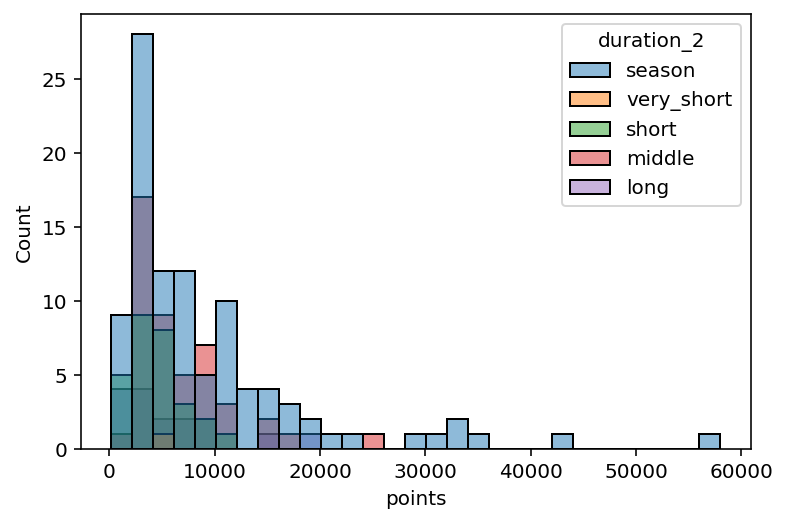

In [218]:
sns.histplot(x='points', data=nf, hue='duration_2')
plt.show()

In [222]:
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 1440x360 with 0 Axes>

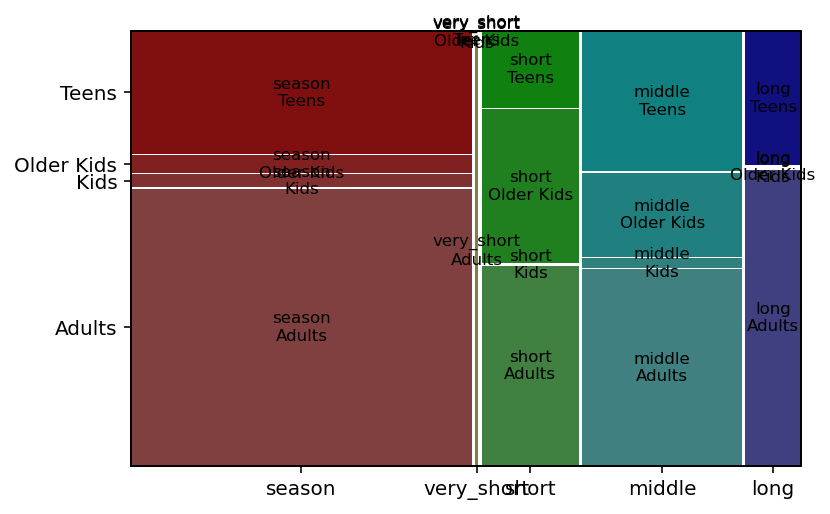

In [225]:
plt.figure(figsize=(20,5))
mosaic(nf, [ 'duration_2','rating'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_2', ylabel='count'>

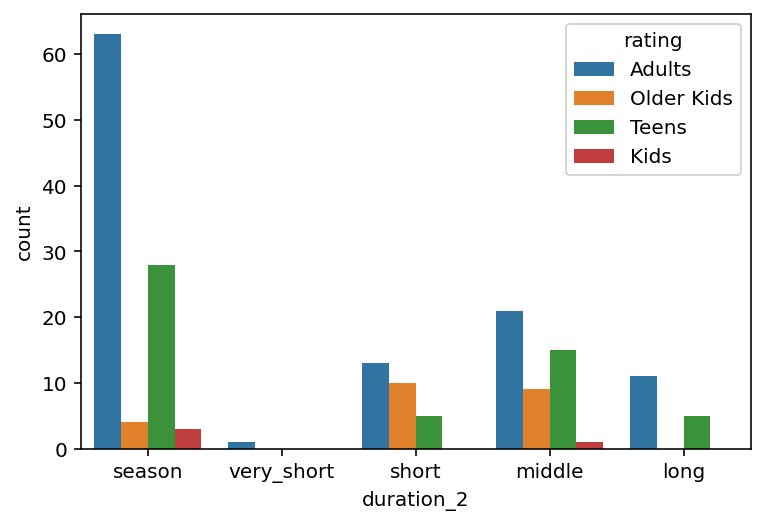

In [227]:
sns.countplot("duration_2" ,hue = 'rating',data = nf)

In [187]:
nf['listed_in']

0                     TV Dramas, TV Horror, TV Mysteries
1                               Children & Family Movies
2                                       Comedies, Dramas
3                                              Thrillers
4      International TV Shows, TV Action & Adventure,...
                             ...                        
184    Action & Adventure, International Movies, Musi...
185                                   Action & Adventure
186                             Children & Family Movies
187                   Children & Family Movies, Comedies
188                   Children & Family Movies, Comedies
Name: listed_in, Length: 189, dtype: object

In [188]:
nf['points'].describe()

count      189.000000
mean      7653.809524
std       7649.866693
min        181.000000
25%       3244.000000
50%       5259.000000
75%       9134.000000
max      57980.000000
Name: points, dtype: float64

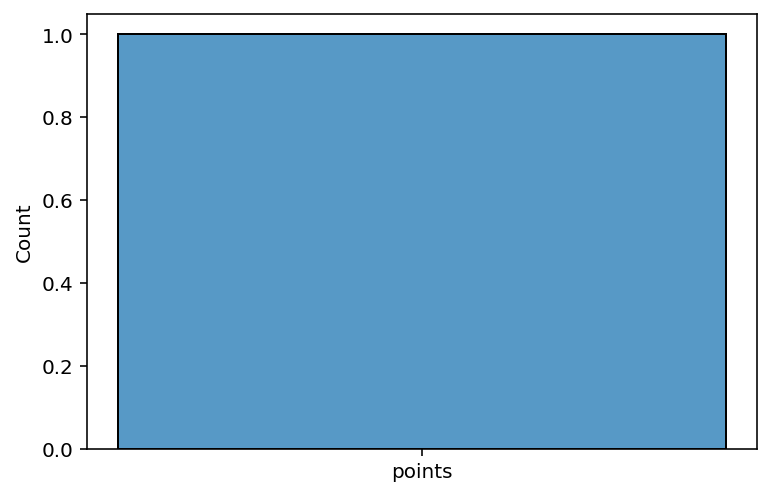

In [193]:
sns.histplot('points', bins=16)
plt.show()

In [185]:
nf = nf.drop_duplicates(ignore_index=True)

In [186]:
nf.isna().sum()

show_id          0
type_x           0
title            0
director        91
cast             8
country         38
date_added       1
release_year     0
rating           0
duration         0
listed_in        0
description      0
points           0
countries        0
ptn/ctry         0
days             0
ptn/day          0
total            0
type_y           0
dtype: int64

In [168]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       570 non-null    object
 1   type_x        570 non-null    object
 2   title         570 non-null    object
 3   director      294 non-null    object
 4   cast          546 non-null    object
 5   country       453 non-null    object
 6   date_added    567 non-null    object
 7   release_year  570 non-null    int64 
 8   rating        570 non-null    object
 9   duration      570 non-null    object
 10  listed_in     570 non-null    object
 11  description   570 non-null    object
 12  points        570 non-null    int64 
 13  countries     570 non-null    int32 
 14  ptn/ctry      570 non-null    int32 
 15  days          570 non-null    int32 
 16  ptn/day       570 non-null    int32 
 17  total         570 non-null    object
 18  type_y        570 non-null    object
dtypes: int32

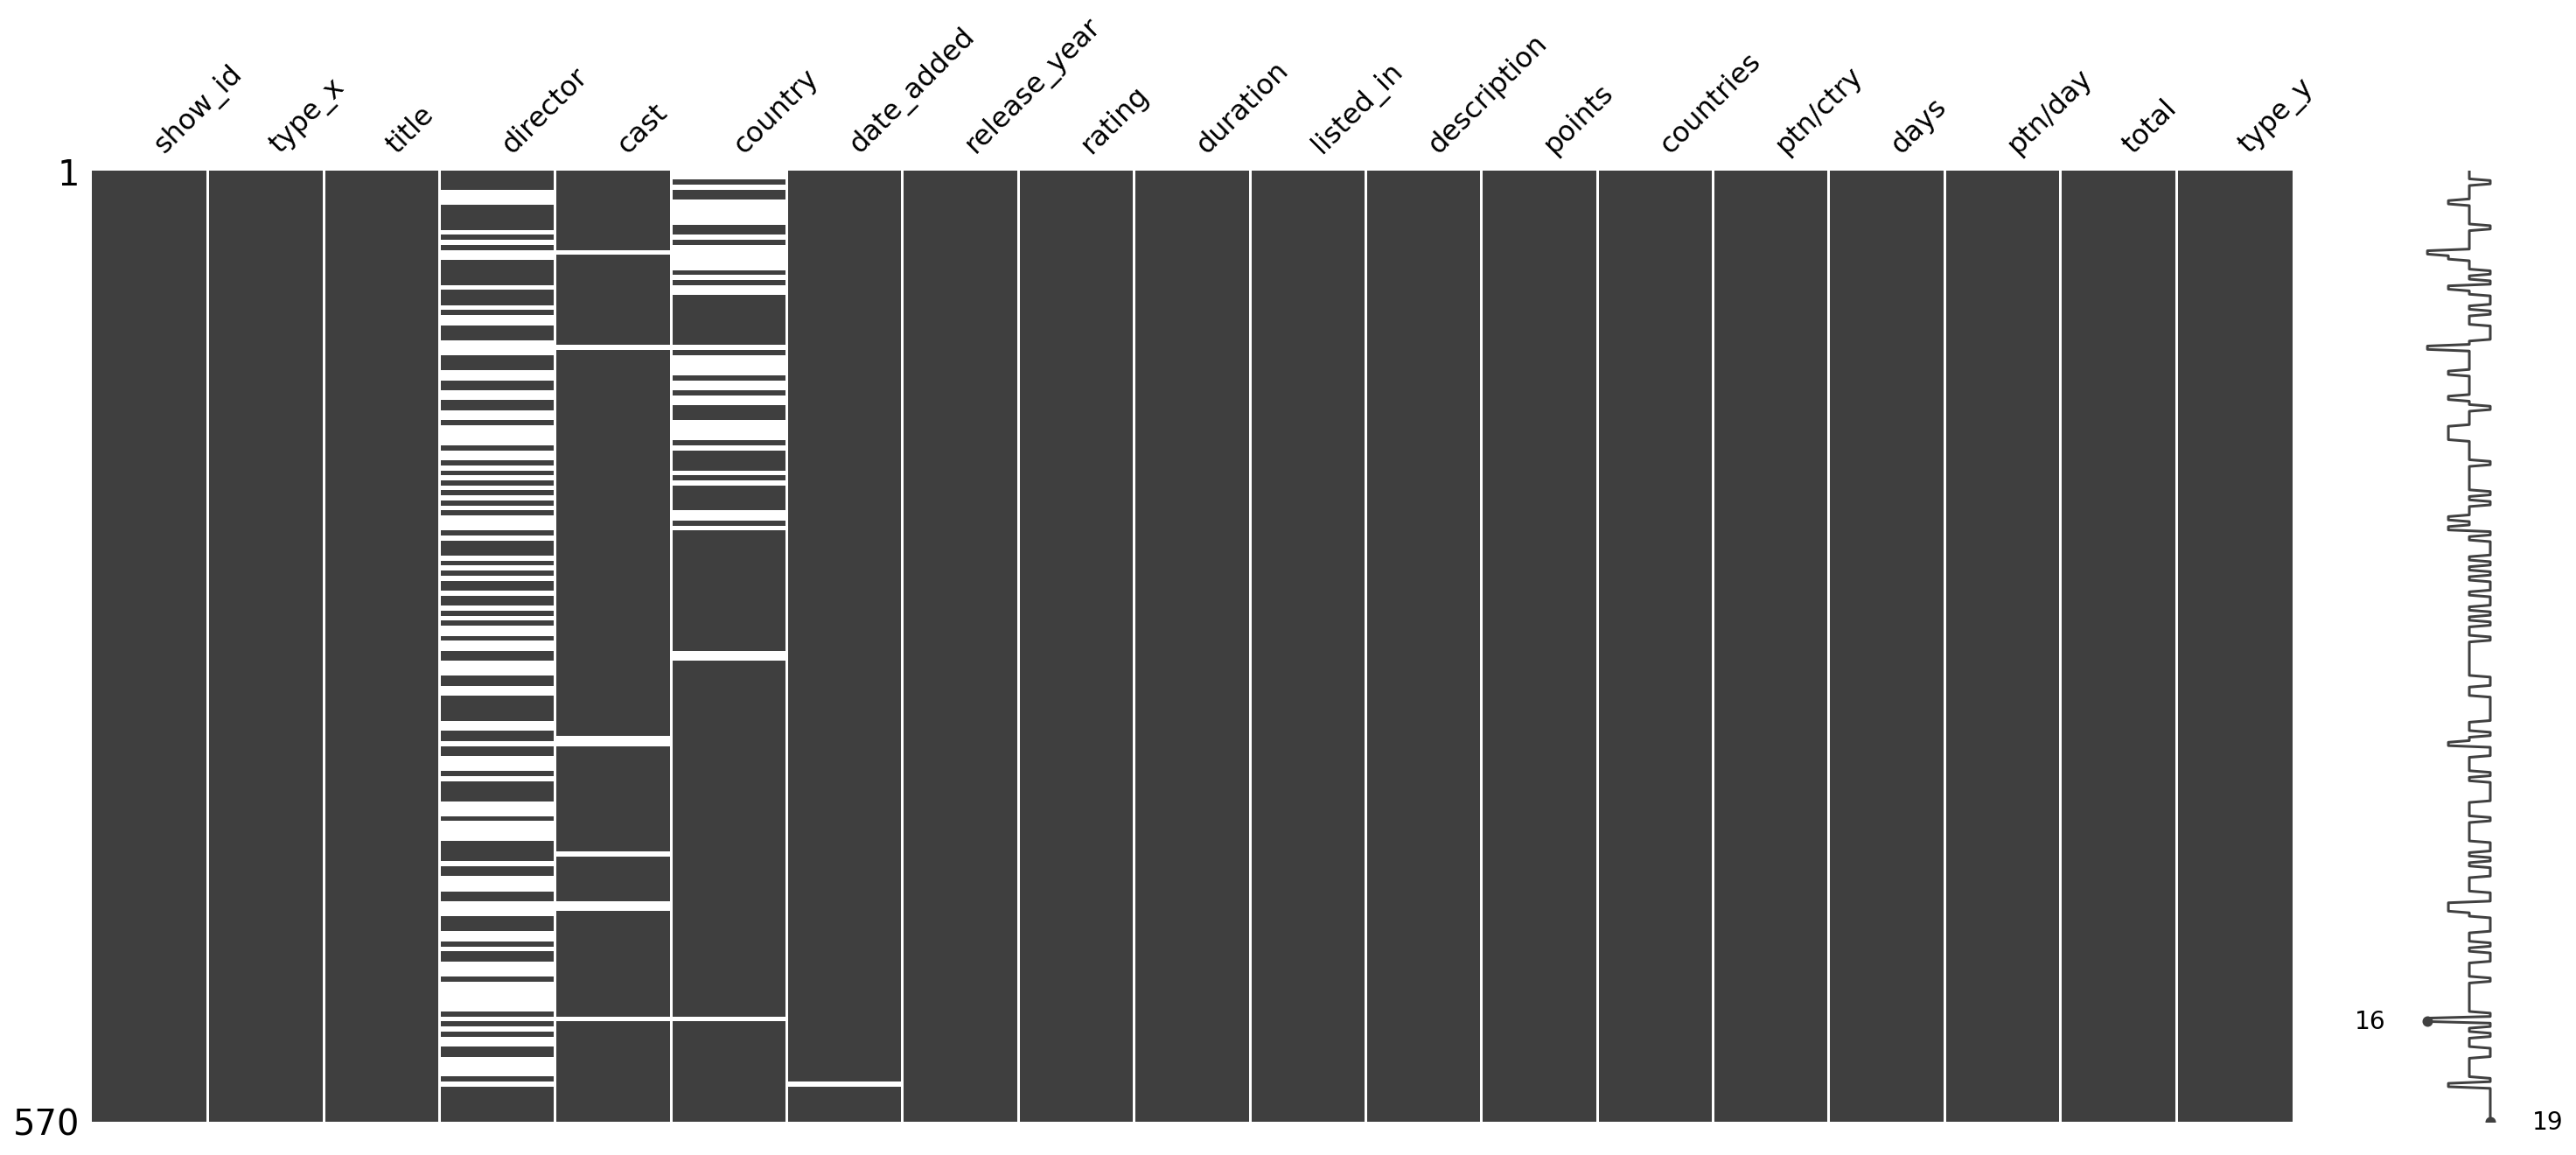

In [183]:
msno.matrix(nf)
plt.show()

In [177]:
rate = 0.8
filtterd_nf = nf.dropna(thresh=int(len(nf)*rate), axis=1)

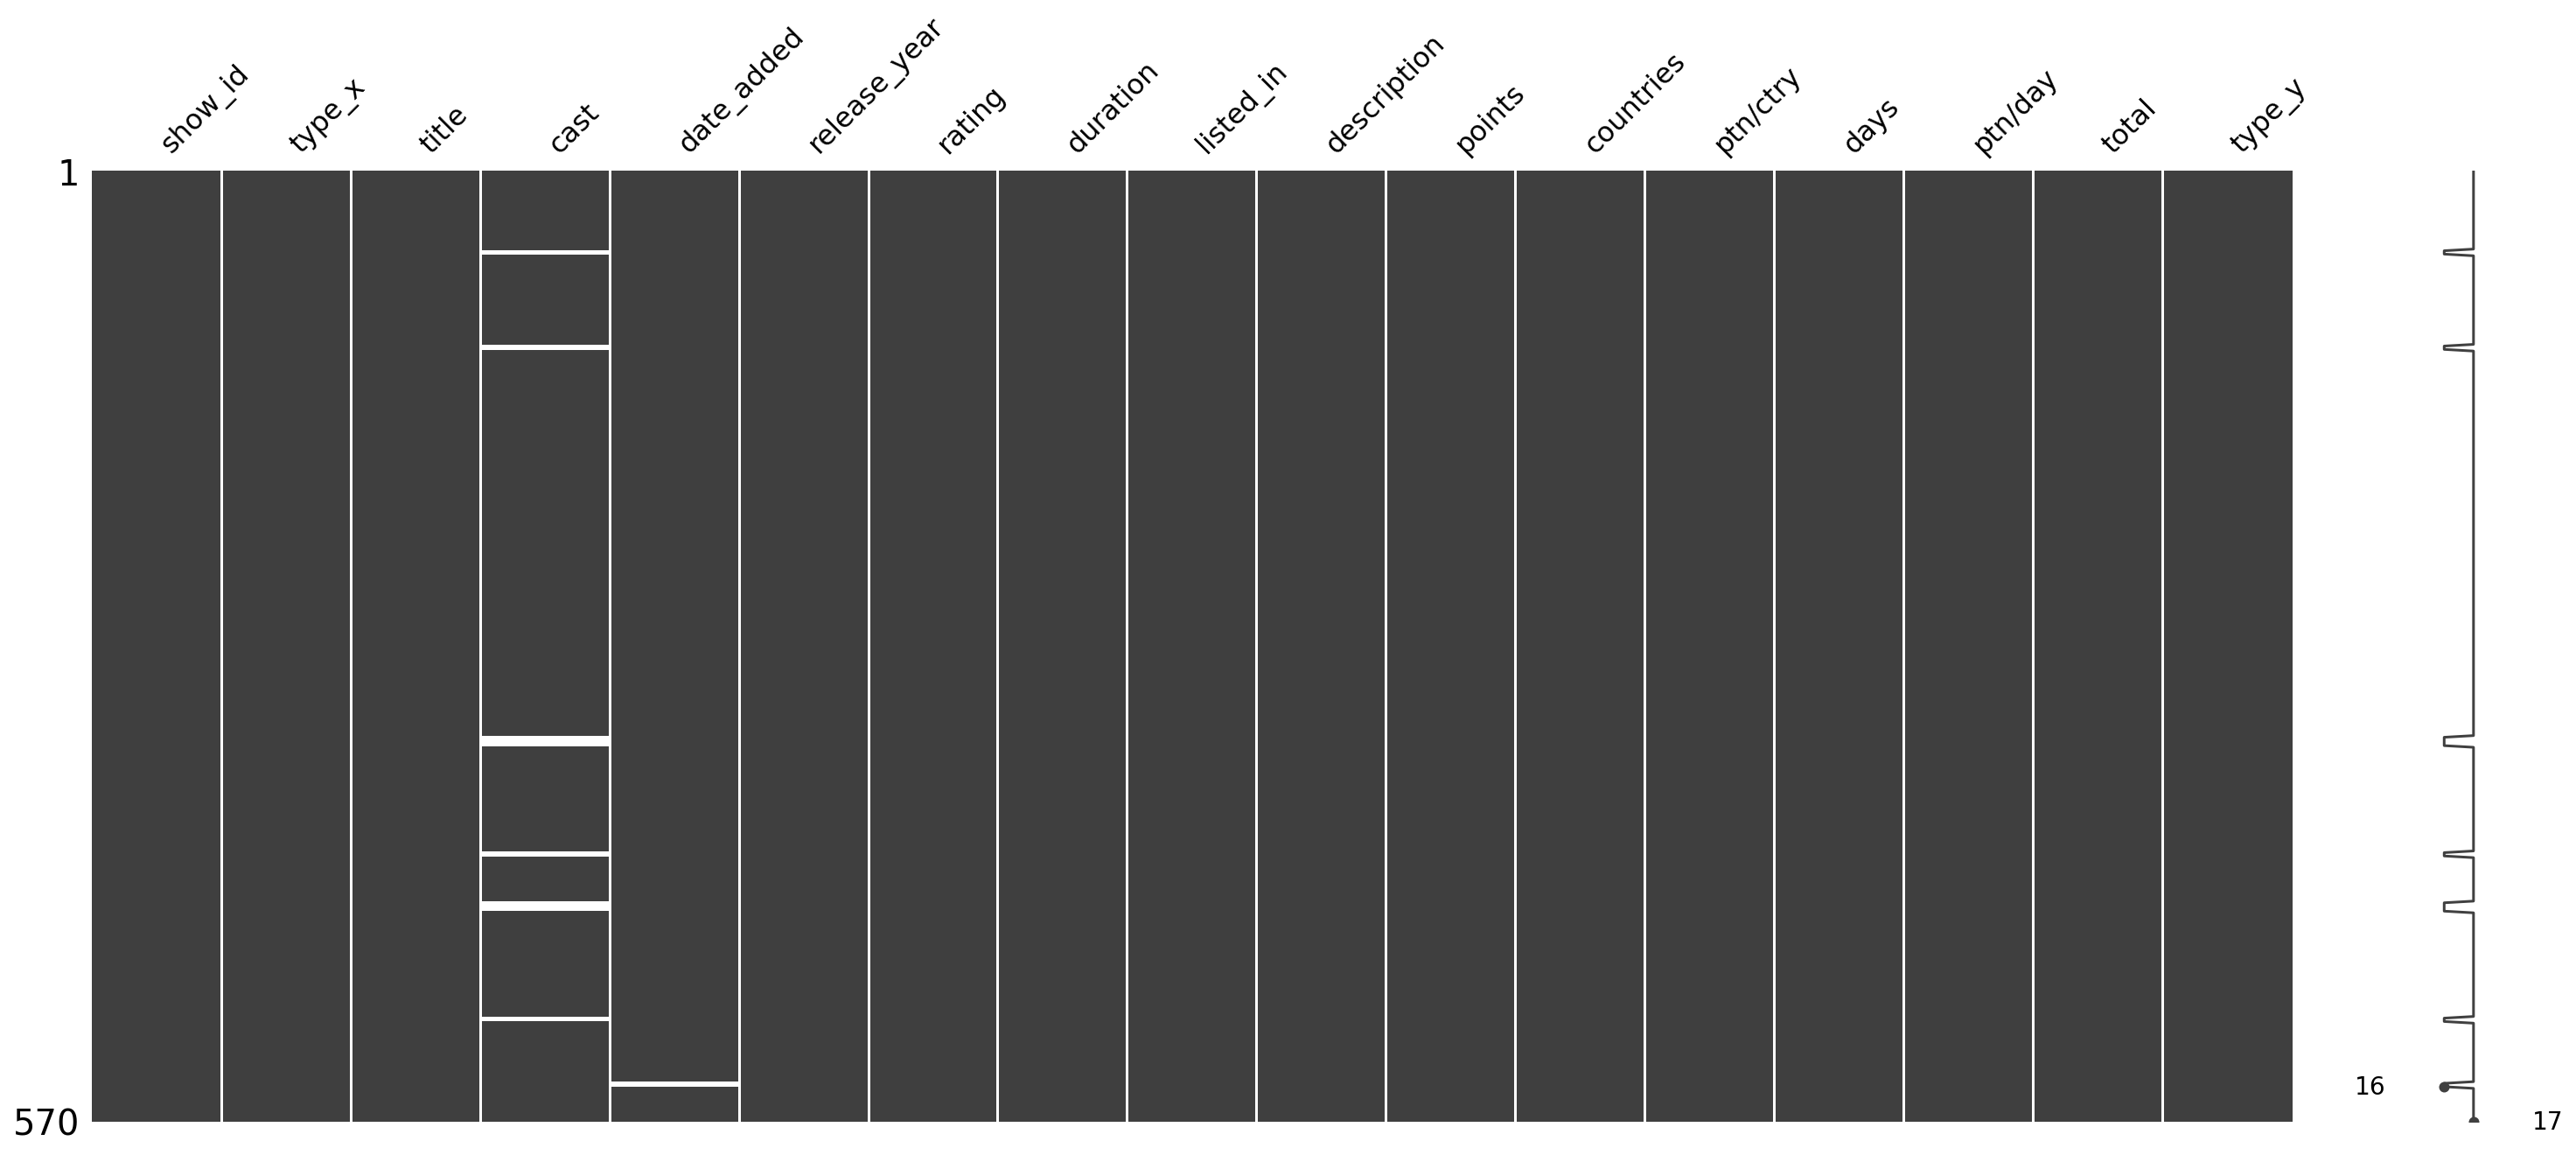

In [179]:
msno.matrix(filtterd_nf)
plt.show()

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

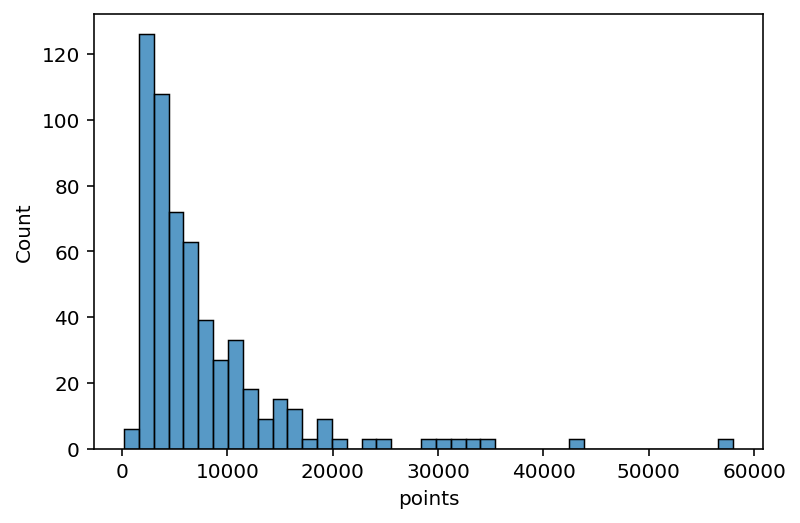

In [170]:
sns.histplot(x='points', data=nf)
plt.show()

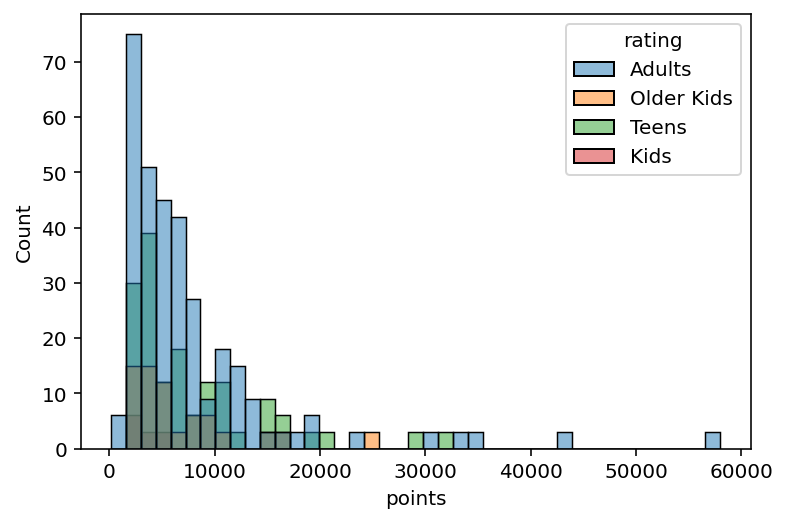

In [171]:
sns.histplot(x='points', data=nf, hue='rating')
plt.show()

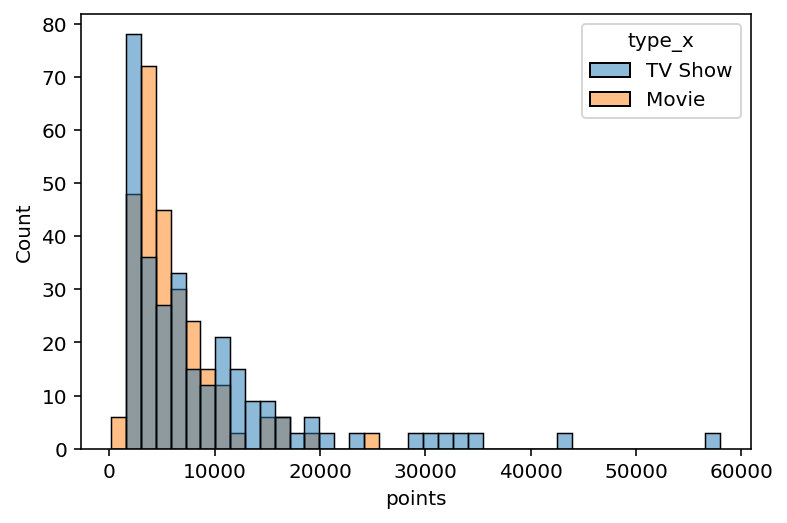

In [172]:
sns.histplot(x='points', data=nf, hue='type_x')
plt.show()

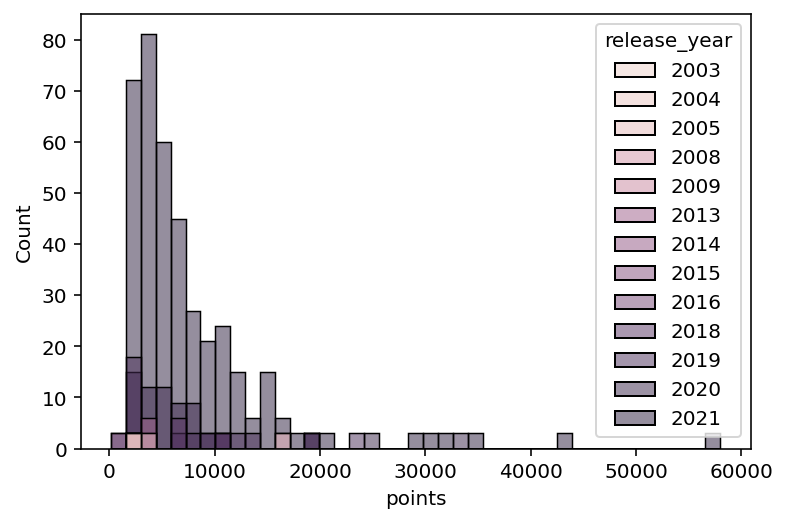

In [173]:
sns.histplot(x='points', data=nf, hue='release_year')
plt.show()

In [175]:
nf['release_year'].value_counts()

2021    399
2020     75
2019     42
2018     15
2013      9
2003      6
2015      6
2004      3
2005      3
2008      3
2009      3
2014      3
2016      3
Name: release_year, dtype: int64

#### EDA의 수행 절차
- 데이터 수집
- 결측 데이터의 처리
- 데이터 탐색
    - 수집한 데이터에서 자유롭게 주제를 선정하여 데이터 분석을 통한 인사이트 도출
    - 예시 : 인도영화는 다른 국가보다 러닝타임이 길것이다. 컨텐츠의 퀄리티가 가장 좋은 국가는?

In [135]:
%config InlineBackend.figure_formats = {'png', 'retina'} # 해상도와 확장자

In [132]:
import missingno as msno

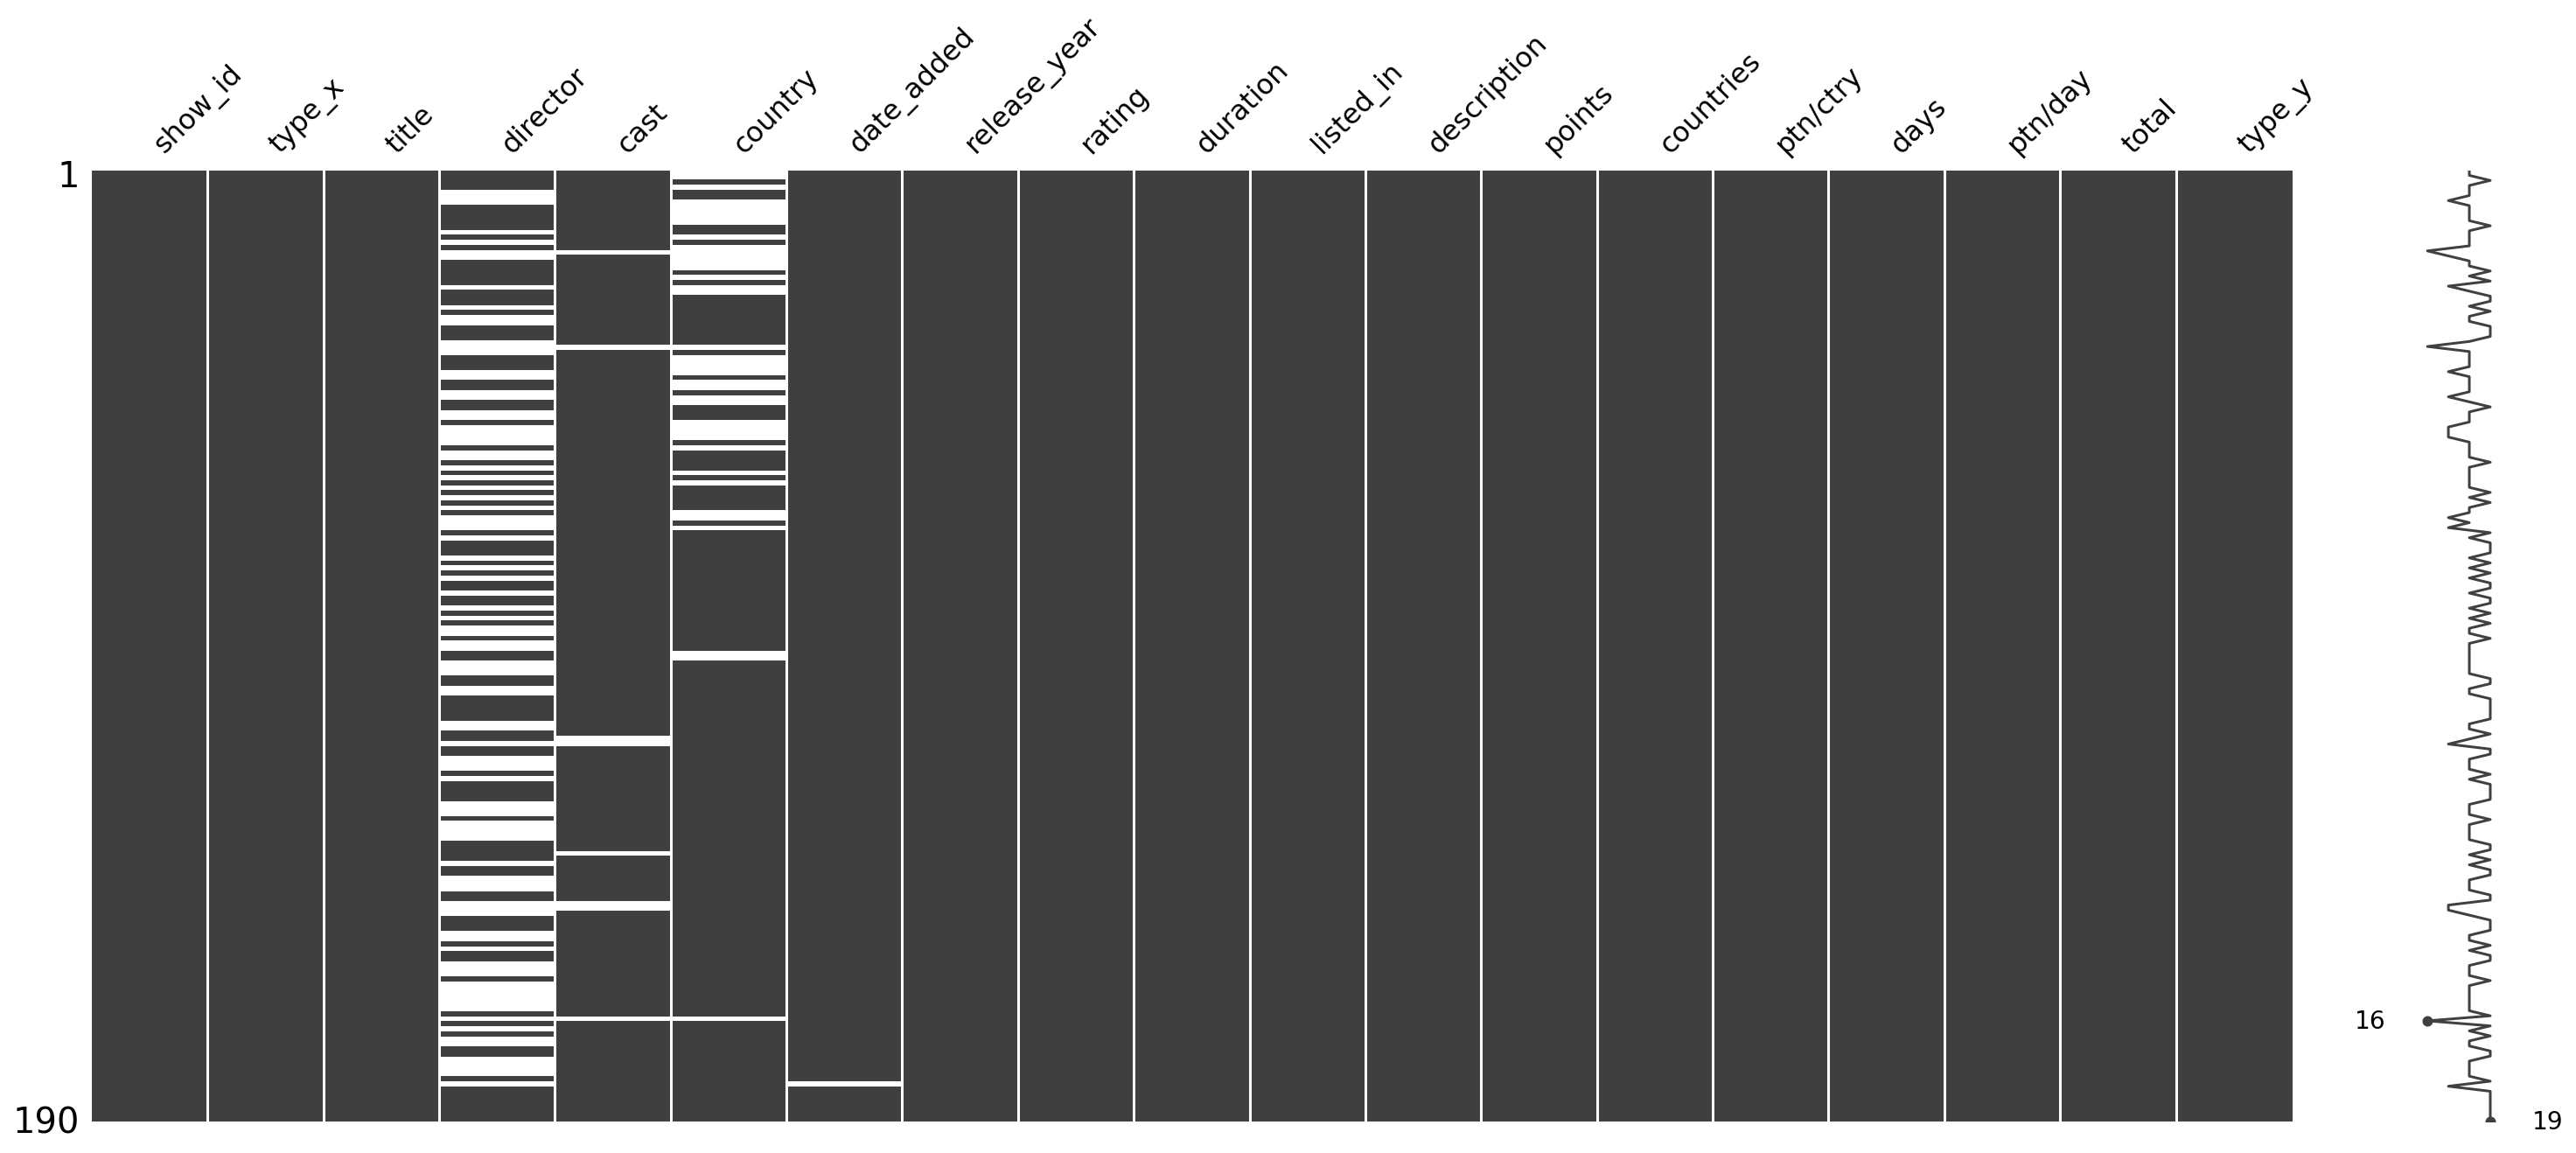

In [136]:
msno.matrix(nf)
plt.show()

In [137]:
# 불필요한 컬럼 제거
rate = 0.8
int(len(nf) * rate)

152

In [138]:
filtterd_nf = nf.dropna(thresh=int(len(nf)*rate), axis=1)

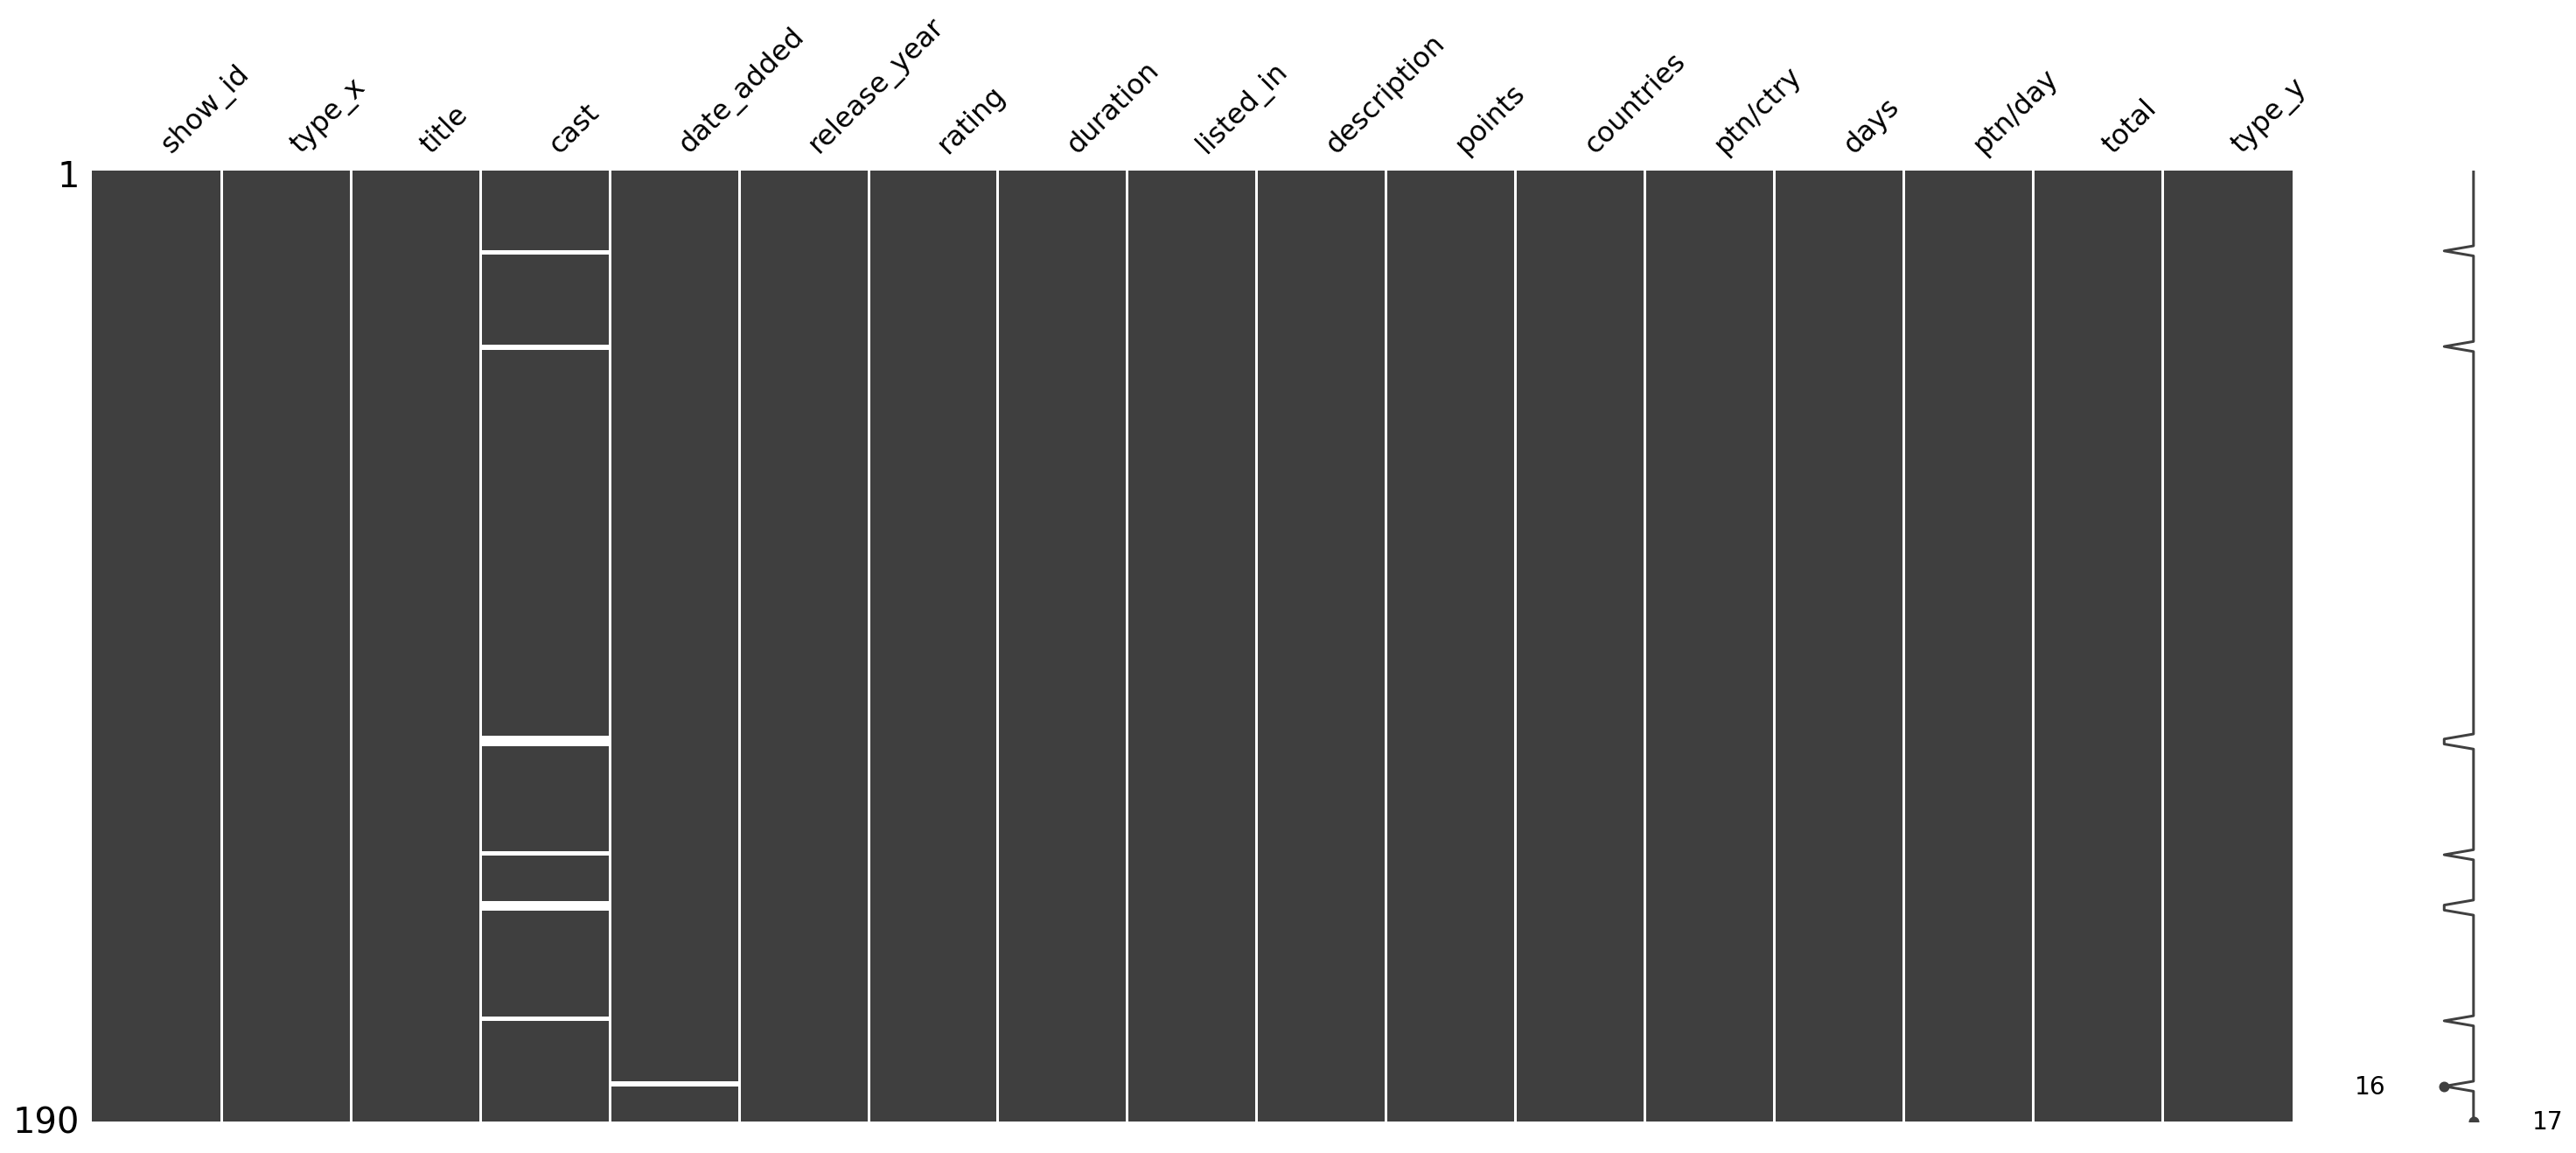

In [139]:
msno.matrix(filtterd_nf)
plt.show()

In [ ]:
# 비어있는 데이터 처리

In [141]:
filtterd_nf['rating'].value_counts()

Adults        110
Teens          53
Older Kids     23
Kids            4
Name: rating, dtype: int64

In [142]:
from sklearn.impute import SimpleImputer

In [143]:
imputer = SimpleImputer(strategy="most_frequent")

In [144]:
nf_titles = imputer.fit_transform(nf_titles[['rating']])

In [147]:
msno.matrix(nf_titles)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'notnull'

#### 컨텐츠 타입과 컨텐츠 등급별 컨텐츠의 비율

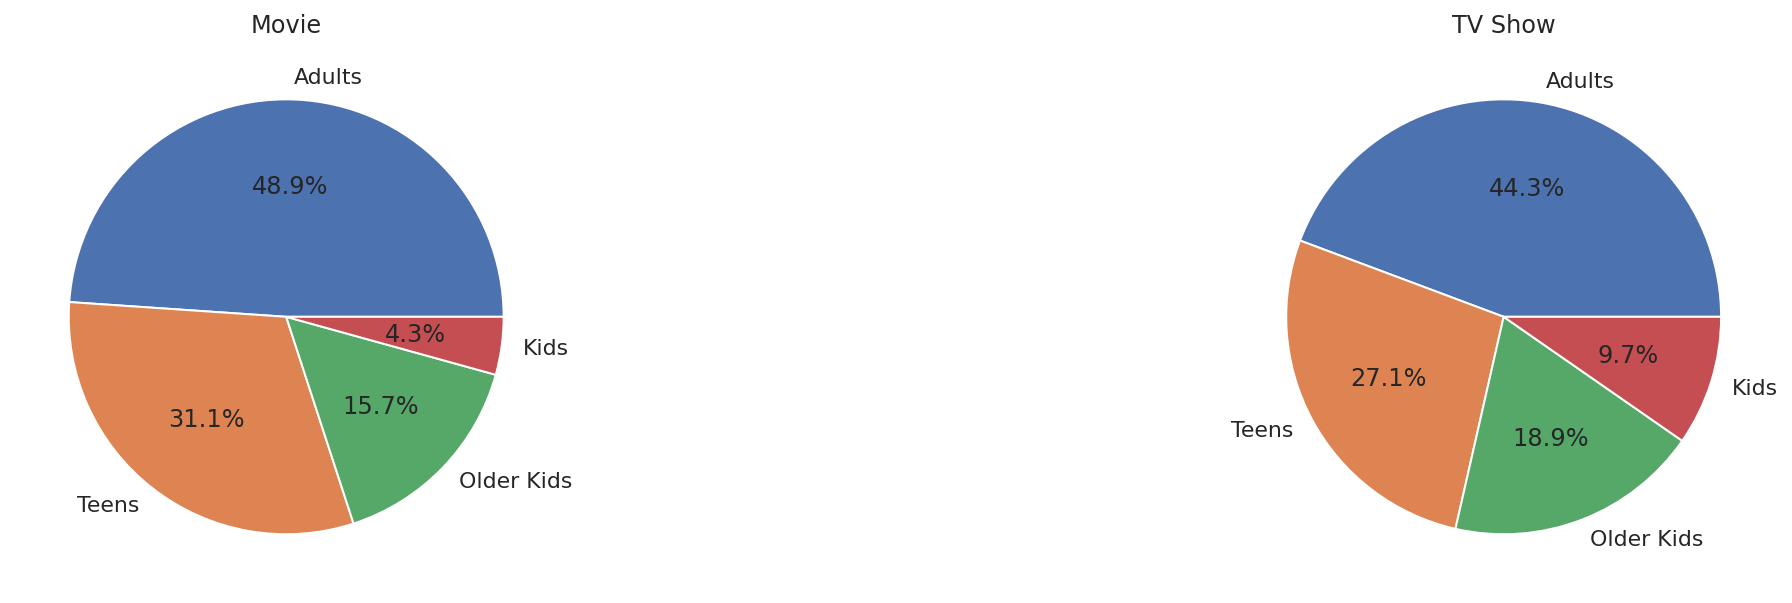

In [21]:
# 아래의 코드는 EDA의 예시를 보여주는 것으로 실제 코드가 동작되지 않습니다.

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values, labels=movie_count.index, autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values, labels=tv_count.index, autopct="%1.1f%%")

plt.show()

결론 : 영화가 TV쇼 보다 청소년 관람불가 등급의 비율이 더 높고 TV가 영화보다 청소년관람등급의 컨텐츠의 비율이 더 높습니다.